In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
train_dir = "C:/Users/SOHAM/python/kaggle_WCD/data/train"
test_dir = "C:/Users/SOHAM/python/kaggle_WCD/data/test"
val_dir = "C:/Users/SOHAM/python/kaggle_WCD/data/valid"

In [5]:
height = 256
width = 256
batch_size = 64

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir,labels='inferred',label_mode='int',image_size=(height, width),batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 13104 files belonging to 15 classes.
['Aphid', 'Black Rust', 'Blast', 'Brown Rust', 'Common Root Rot', 'Fusarium Head Blight', 'Healthy', 'Leaf Blight', 'Mildew', 'Mite', 'Septoria', 'Smut', 'Stem fly', 'Tan spot', 'Yellow Rust']


In [7]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,labels='inferred',label_mode='int',image_size=(height, width),batch_size=batch_size)

print(len(test_ds.class_names))

Found 750 files belonging to 15 classes.
15


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,labels='inferred',label_mode='int',image_size=(height, width),batch_size=batch_size)
print(len(val_ds.class_names))

Found 300 files belonging to 15 classes.
15


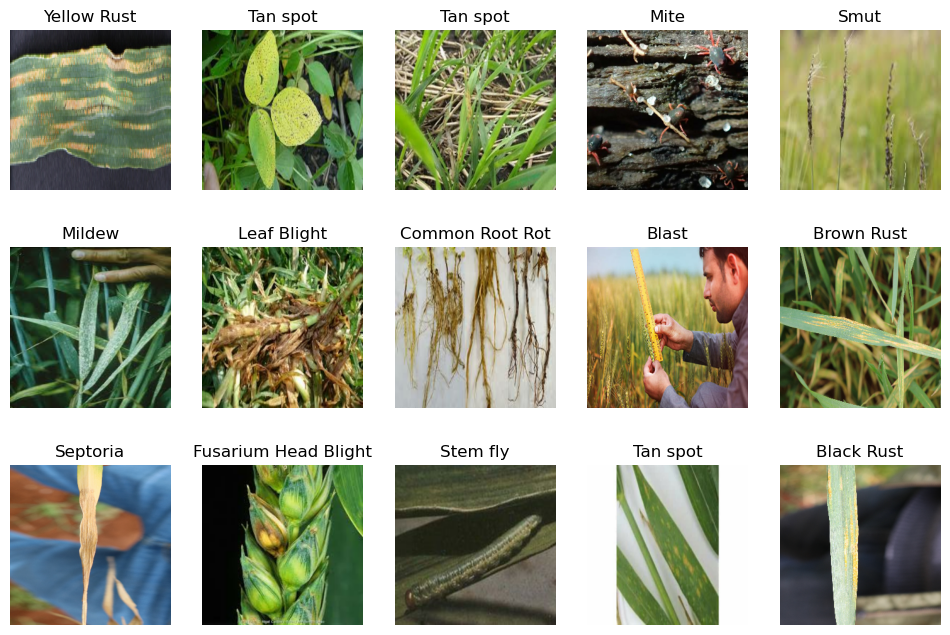

In [7]:

plt.figure(figsize=(12, 8))
for images, labels in train_ds.take(1):
    for i in range(15):          
        ax = plt.subplot(3, 5, i + 1)    
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [8]:

for x,y in val_ds:
    print(x,x.shape)
    print(y,y.shape)
   

tf.Tensor(
[[[[ 19.          83.          57.        ]
   [ 23.          88.          56.        ]
   [ 23.          88.          56.        ]
   ...
   [ 65.         114.          42.        ]
   [ 73.         123.          55.        ]
   [ 73.         123.          55.        ]]

  [[ 19.          83.          57.        ]
   [ 20.          85.          53.        ]
   [ 20.          85.          53.        ]
   ...
   [ 67.         116.          44.        ]
   [ 73.         124.          53.        ]
   [ 73.         124.          53.        ]]

  [[ 29.          91.          64.        ]
   [ 29.          92.          60.        ]
   [ 29.          92.          60.        ]
   ...
   [ 71.         118.          47.        ]
   [ 77.         125.          55.        ]
   [ 77.         125.          55.        ]]

  ...

  [[126.         167.          94.        ]
   [121.         164.          80.        ]
   [121.         164.          80.        ]
   ...
   [106.         150.   

In [9]:


img_size = (256, 256)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)])

preprocess = keras.Sequential([layers.Rescaling(1./255)])


In [10]:
class_names

['Aphid',
 'Black Rust',
 'Blast',
 'Brown Rust',
 'Common Root Rot',
 'Fusarium Head Blight',
 'Healthy',
 'Leaf Blight',
 'Mildew',
 'Mite',
 'Septoria',
 'Smut',
 'Stem fly',
 'Tan spot',
 'Yellow Rust']

In [10]:
num_classes = len(class_names)

model = keras.Sequential([
    layers.Input(shape=img_size + (3,)),
    data_augmentation,        
    preprocess,              

    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax"),
])



In [55]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


In [57]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
)


Epoch 1/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 763s 4s/step - accuracy: 0.4222 - loss: 1.8565 - val_accuracy: 0.2767 - val_loss: 2.6924
Epoch 2/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 755s 4s/step - accuracy: 0.4990 - loss: 1.5853 - val_accuracy: 0.2867 - val_loss: 2.6808
Epoch 3/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 780s 4s/step - accuracy: 0.5449 - loss: 1.4397 - val_accuracy: 0.3733 - val_loss: 2.5364
Epoch 4/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 792s 4s/step - accuracy: 0.5730 - loss: 1.3347 - val_accuracy: 0.3900 - val_loss: 2.5244
Epoch 5/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 777s 4s/step - accuracy: 0.6015 - loss: 1.2539 - val_accuracy: 0.3900 - val_loss: 2.6350


In [58]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),  # Lower from 1e-3
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Add early stopping + ReduceLROnPlateau
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
]

history = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=callbacks)


Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 794s 4s/step - accuracy: 0.6489 - loss: 1.0902 - val_accuracy: 0.4100 - val_loss: 2.3087 - learning_rate: 3.0000e-04
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 807s 4s/step - accuracy: 0.6636 - loss: 1.0277 - val_accuracy: 0.4500 - val_loss: 2.2592 - learning_rate: 3.0000e-04
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 800s 4s/step - accuracy: 0.6774 - loss: 0.9836 - val_accuracy: 0.4500 - val_loss: 2.3533 - learning_rate: 3.0000e-04
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 797s 4s/step - accuracy: 0.6832 - loss: 0.9630 - val_accuracy: 0.4333 - val_loss: 2.3061 - learning_rate: 3.0000e-04
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 827s 4s/step - accuracy: 0.6941 - loss: 0.9343 - val_accuracy: 0.4733 - val_loss: 2.3148 - learning_rate: 3.0000e-04
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 793s 4s/step - accuracy: 0.7162 - loss: 0.8686 - val_accuracy: 0.4633 - val_loss: 2.4884 - learning_rate: 1.5000e-04
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 778s 4s/step - acc

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'   

import numpy as np
import torch
print(f"PyTorch: {torch.__version__}, CUDA: {torch.cuda.is_available()}")

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

PyTorch: 2.5.1, CUDA: True


In [2]:
train_dataset = datasets.ImageFolder("C:/Users/SOHAM/python/kaggle_WCD/data/train", 
                                   transform=transforms.Compose([
                                       transforms.Resize((224, 224)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)) # first for RGB and normalize between -1,1 for fast convger
                                   ]))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

val_dataset = datasets.ImageFolder("C:/Users/SOHAM/python/kaggle_WCD/data/valid", 
                                 transform=transforms.Compose([
                                     transforms.Resize((224, 224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                                 ]))
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

In [5]:
num_classes = len(train_dataset.classes)
num_classes

15

In [7]:
class WheatCNN(nn.Module):
    def __init__(self, num_classes=4):   
        super(WheatCNN, self).__init__()         #( input channels , no of feature maps , kernal size / filter size , stride)
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1) # by doing padding by 1 pixel its now 226,226 and then 226 - 3 + 1 ( ((I - K + 2P)/stride)  + 1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)  # 226 - 3 + 1 = 224
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        
        # After 4 conv+pool: 224→112→56→28→14
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)
        
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        # Conv Block 1
        x = self.pool(self.relu(self.conv1(x)))
        # Conv Block 2  
        x = self.pool(self.relu(self.conv2(x)))
        # Conv Block 3
        x = self.pool(self.relu(self.conv3(x)))
        # Conv Block 4
        x = self.pool(self.relu(self.conv4(x)))
        
        # Flatten
        x = x.view(-1, 256 * 14 * 14)
        
        # FC layers
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = WheatCNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
def train_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for batch_idx, (images, labels) in enumerate(loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        if batch_idx % 10 == 0:
            print(f'Batch {batch_idx}/{len(loader)} Loss: {loss.item():.3f}')
    
    return running_loss/len(loader), correct/total

In [ ]:
from sklearn.metrics import classification_report, f1_score
import numpy as np

 
def validate_epoch(model, loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0, 0, 0
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    val_acc = correct / total
    val_f1 = f1_score(all_labels, all_preds, average='weighted')
    return running_loss/len(loader), val_acc, val_f1, all_preds, all_labels

 
epochs = 30
best_val_acc = 0
patience_counter = 0
patience = 7

 

for epoch in range(epochs):
     
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)
    
    
    val_loss, val_acc, val_f1, preds, labels = validate_epoch(model, val_loader, criterion, device)
    
    print(f"Epoch {epoch+1}/30")
    print(f"  Train: {train_acc:.1%} (Loss: {train_loss:.3f})")
    print(f"  Val:   {val_acc:.1%} (F1: {val_f1:.3f})")
    print("-" * 50)
    
 
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_wheat_cnn.pth')
        patience_counter = 0
        print(f"new best: {best_val_acc:.1%}")
    else:
        patience_counter += 1
    
    # Early stopping
    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

 
print(classification_report(labels, preds, target_names=train_dataset.classes))
print(f"\n  BEST MODEL: best_wheat_cnn.pth (Val Acc: {best_val_acc:.1%})")

In [44]:
# if u want to execute and try the model, download the best_wheat_cnn.pth file in ur pwd and run this cell

import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image

 
class WheatCNN(nn.Module):
    def __init__(self, num_classes=4):  
        super(WheatCNN, self).__init__()         #( input channels , no of feature maps , kernal size / filter size , stride)
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1) # by doing padding by 1 pixel its now 226,226 and then 226 - 3 + 1 ( ((I - K)/stride)  + 1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)  # 226 - 3 + 1 = 224
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        
        # After 4 conv+pool: 224→112→56→28→14
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)
        
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        # Conv Block 1
        x = self.pool(self.relu(self.conv1(x)))
        # Conv Block 2  
        x = self.pool(self.relu(self.conv2(x)))
        # Conv Block 3
        x = self.pool(self.relu(self.conv3(x)))
        # Conv Block 4
        x = self.pool(self.relu(self.conv4(x)))
        
        # Flatten
        x = x.view(-1, 256 * 14 * 14)
        
        # FC layers
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x


 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = WheatCNN(num_classes=15).to(device)
state_dict = torch.load(r"C:\Users\SOHAM\best_wheat_cnn.pth", map_location=device)
model.load_state_dict(state_dict)
model.eval()

 
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),  
])

classes = ['Aphid', 'Black Rust', 'Blast', 'Brown Rust', 'Common Root Rot',
           'Fusarium Head Blight', 'Healthy', 'Leaf Blight', 'Mildew',
           'Mite', 'Septoria', 'Smut', 'Stem fly', 'Tan spot', 'Yellow Rust']
 
def predict_image(path):
    img = Image.open(path).convert("RGB")
    x = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        logits = model(x)
        probs = torch.softmax(logits, dim=1)
        idx = torch.argmax(probs, dim=1).item()
        conf = probs[0, idx].item()

    print(f"Predicted: {classes[idx]} ({conf:.1%})")

# 5. EXAMPLE CALL
if __name__ == "__main__":
    predict_image(r"C:\Users\SOHAM\OneDrive\画像\Screenshots\Screenshot 2025-12-20 011548.png")
# put the image path here
 ## https://drive.google.com/drive/folders/1Ymm1ILnmFEChThGNbQTd3KTe-eeZwtZn?usp=drive_link
 ##download the model

C:\Users\SOHAM\AppData\Local\Temp\ipykernel_36160\3260056224.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(r"C:\Users\SOHAM\best_wheat_cnn.pth

Predicted: Brown Rust (54.6%)


In [42]:
## https://drive.google.com/drive/folders/1Ymm1ILnmFEChThGNbQTd3KTe-eeZwtZn?usp=drive_link
##download the model

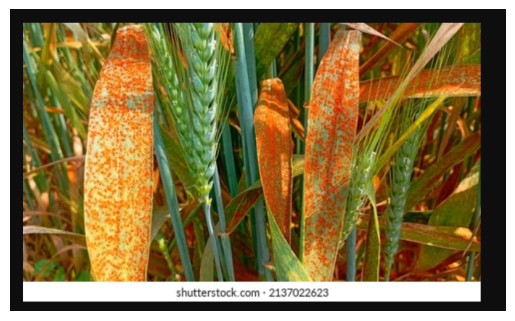

In [41]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = r"C:\Users\SOHAM\OneDrive\画像\Screenshots\Screenshot 2025-12-20 011548.png"
img = Image.open(img_path).convert("RGB")

plt.imshow(img)
plt.axis("off")  
plt.show()
